# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju Korogi Oliveira e Gabriel Limas Nunes
### **Matrículas:**  2021032110 e 2021032048


### **Tema:** Saúde Fetal
### **Base de dados:** https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **ChatGPT Links**

**Business Understanding** https://chat.openai.com/share/9d1b3832-9012-49bd-b88d-5e90c5bd855b

**Data Understanding:** https://chat.openai.com/share/6dcdf3b7-ae2a-4f8c-bdd6-e1ae035cccb9

**Data Preparation:** https://chat.openai.com/share/f6051d9f-47e4-4d29-bb19-627eedb446d4

**Modeling:** https://chat.openai.com/share/586fbef8-afe3-4a4c-8e60-df00275d092d

**Evaluation:** https://chat.openai.com/share/cbde6461-47cd-46d1-a7f5-920d8ba1d7bc


## Imports

In [3]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import resample
from scipy.stats import sem, t, ttest_rel
from sklearn.decomposition import PCA

In [4]:
warnings.simplefilter(action='ignore')

# **Introdução**

O foco deste trabalho prático é a análise de dados de Cardiotocogramas (CTGs), um método acessível para avaliação da saúde fetal durante a gravidez. O conjunto de dados contém 2126 registros classificados em três categorias: Normal, Suspeito e Patológico.

# **Motivação**

A redução da mortalidade infantil é um indicador chave de progresso humano. Até 2030, espera-se que os países reduzam a mortalidade infantil para, no máximo, 25 por 1.000 nascidos vivos. Os CTGs, ao fornecerem informações sobre a saúde fetal, são cruciais para prevenir mortes infantis e maternas, especialmente em ambientes com recursos limitados.

A análise destes dados pode oferecer insights essenciais sobre a saúde fetal, possibilitando a identificação precoce de potenciais riscos. A classificação em Normal, Suspeito e Patológico pode orientar decisões médicas preventivas, contribuindo para a redução da mortalidade infantil e materna, alinhando-se a metas globais de saúde.

# **Objetivo**

## **Geral**


O principal objetivo deste projeto é aplicar técnicas de classificação no conjunto de dados de Cardiotocogramas (CTGs) para categorizar os registros em três classes: Normal, Suspeito e Patológico. A intenção é desenvolver modelos preditivos capazes de automatizar a classificação da saúde fetal a partir das características extraídas dos CTGs.


## **Específicos**


Precisão da Classificação: Alcançar uma alta precisão na classificação das categorias Normal, Suspeito e Patológico.

Avaliação de Desempenho: Realizar uma análise abrangente de desempenho, considerando métricas como precisão, recall e F1-score.

Comparação de Modelos: Testar e comparar o desempenho de diferentes algoritmos de classificação, como Naive Bayes, Árvore de Decisão, Linear Discriminant Analysis e Support Vector Machine, para identificar a abordagem mais eficaz.



# **Metodologia**



Criar um classificador para um dataset envolve múltiplos passos, anteriores a aplicação dos algoritmos de classificação.

Primeiramente, é necessário adquirir o dataset apropriado para esse projeto e entender quais são os dados presentes nele e o que representam.

Em seguida, precisamos realizar um pré-processamento dos dados, em que o dataset é limpo e normalizado, com o objetivo de evitar erros e bias, e é preparado para a aplicação de algoritmos de aprendizado de máquina não supervisionados.

Uma vez que o processo de limpeza e normalização foi realizado, podemos começar o processo de classificação utilizando diferentes algoritmos de classificação como Naive Bayes, Árvore de Decisão, SVM, etc. A partir dos resultados iniciais dos classificadores podemos realizar a optimização dos mesmos variando os hiperparâmetros.

Em seguida, realizamos a avaliação de nossos modelos de classificação utilizando diferentes métricas como F1, recall, acurácia, e diferentes métodos de avaliação como Cross Validation, Bootstrap, Confidence Intervals e Paired t-test.

# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


#### Carregar csv

In [5]:
#Carregando a base de dados
df = pd.read_csv('./fetal_health.csv', delimiter=',', encoding='utf-8')

#### Explorar o Dataframe

In [6]:
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Os atributos dessa base são:
- baseline value: Fetal heart rate baseline (beats per minute)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of light decelerations per second
- severe_decelerations: Number of severe decelerations per second
- prolongued_decelerations: Number of prolonged decelerations per second
- abnormal_short_term_variability: Percentage of time with abnormal short-term variability
- mean_value_of_short_term_variability: Mean value of short-term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long-term variability
- mean_value_of_long_term_variability: Mean value of long-term variability
- histogram_width: Width of FHR histogram
- histogram_min: Minimum of FHR histogram
- histogram_max: Maximum of FHR histogram
- histogram_number_of_peaks: Number of FHR histogram peaks
- histogram_number_of_zeroes: Number of FHR histogram zeroes
- histogram_mode: FHR histogram mode
- histogram_mean: FHR histogram mean
- histogram_median: FHR histogram median
- histogram_variance: FHR histogram variance
- histogram_tendency: FHR histogram tendency
- fetal_health: Fetal state class code (1=Normal, 2=Suspected, 3=Pathological)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### Entendimento do Alvo

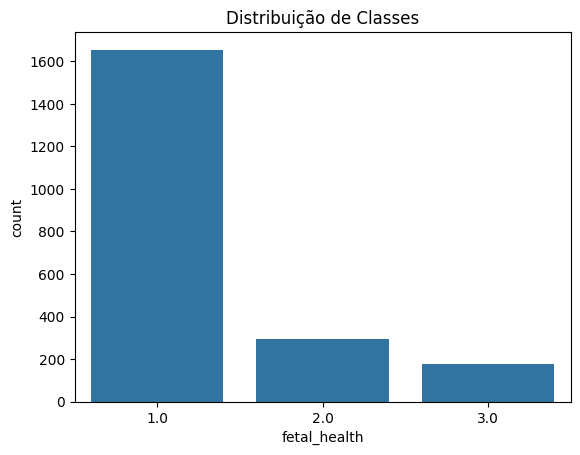

In [8]:
sns.countplot(x='fetal_health', data=df)
plt.title('Distribuição de Classes')
plt.show()

#### Estatísticas Descritivas

In [9]:
print(df.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

#### Matriz de Correlação

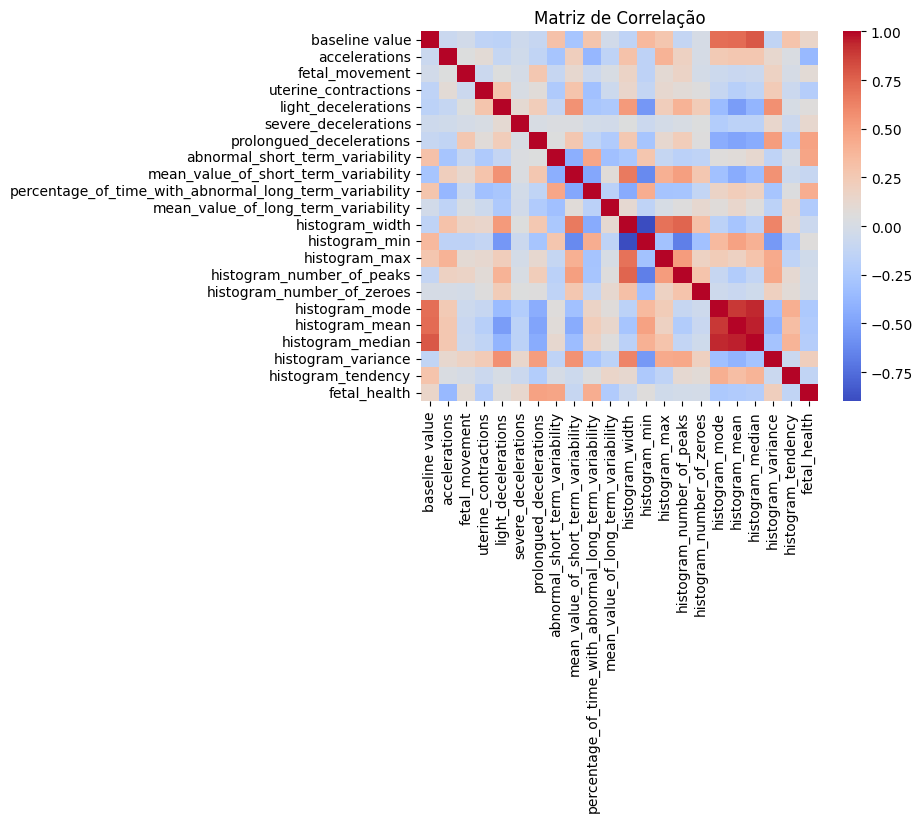

In [44]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


A matriz acima não mostra muitas correlções fortes. Exceto entre as features: histogram_mode, histogram_mean, histogram_median, baseline_value o que é esperado, já que elas todas se refeream a mesma característica (fetal heart rate baseline).

#### Análise de Variáveis Relacionadas ao Ritmo Cardíaco Fetal

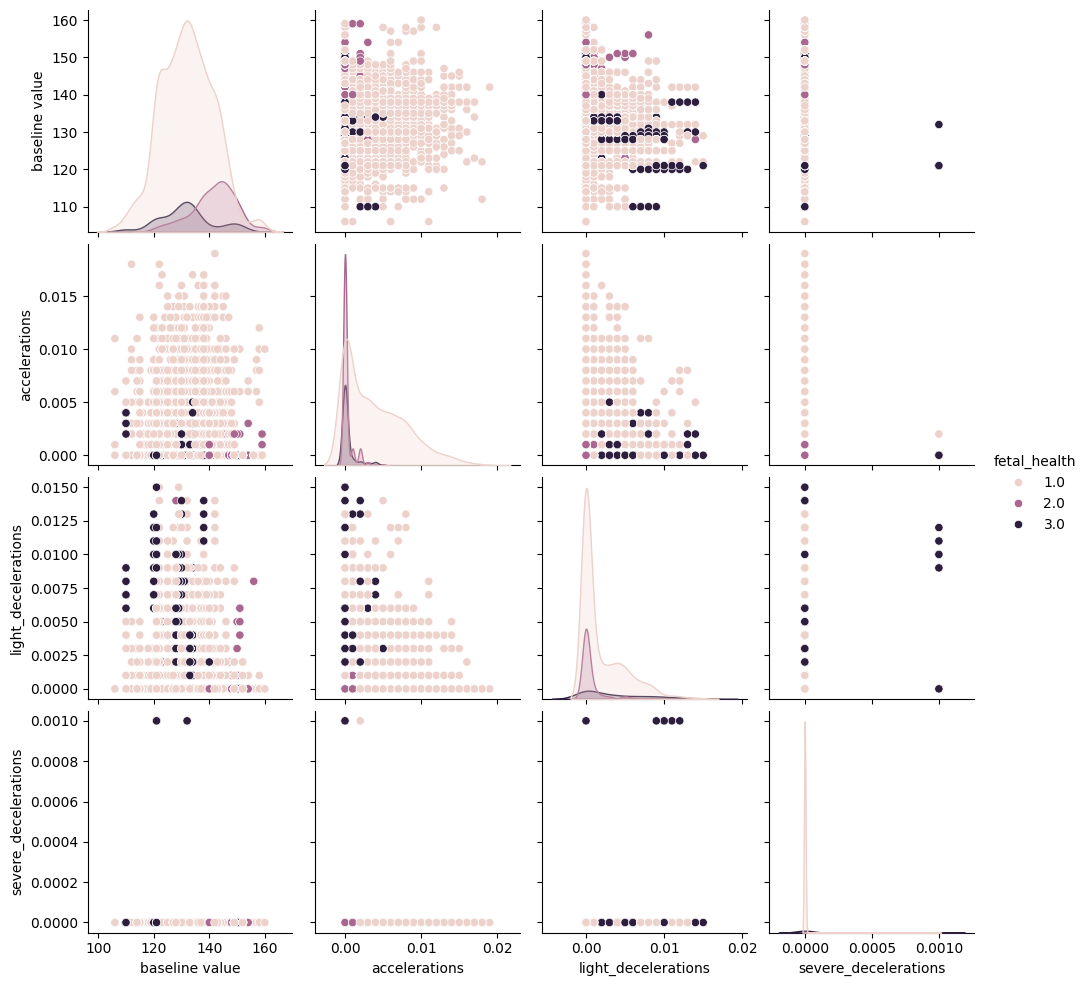

In [11]:
fhr_variables = ['baseline value', 'accelerations', 'light_decelerations', 'severe_decelerations']
sns.pairplot(df, hue='fetal_health', vars=fhr_variables)
plt.show()

#### Análise de Variáveis de Variabilidade

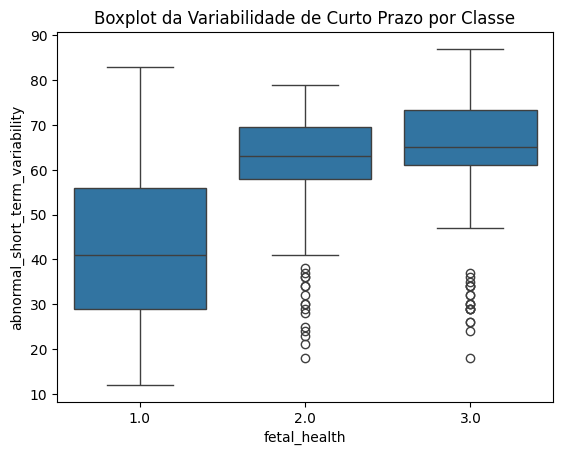

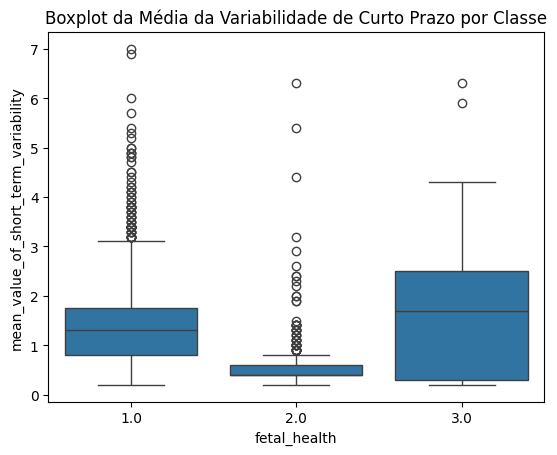

In [12]:
variability_variables = ['abnormal_short_term_variability', 'mean_value_of_short_term_variability']
sns.boxplot(x='fetal_health', y='abnormal_short_term_variability', data=df)
plt.title('Boxplot da Variabilidade de Curto Prazo por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='mean_value_of_short_term_variability', data=df)
plt.title('Boxplot da Média da Variabilidade de Curto Prazo por Classe')
plt.show()

#### Análise de Variáveis de Histograma

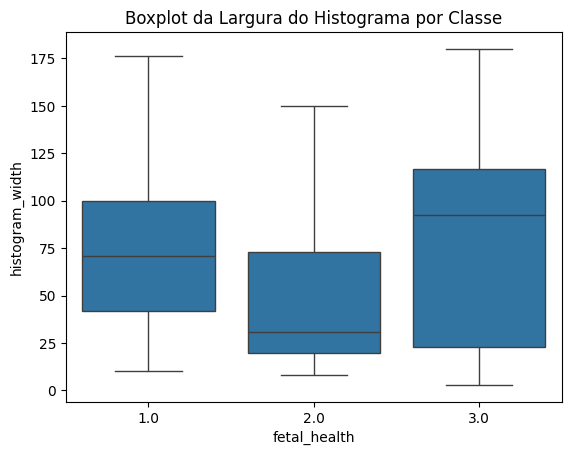

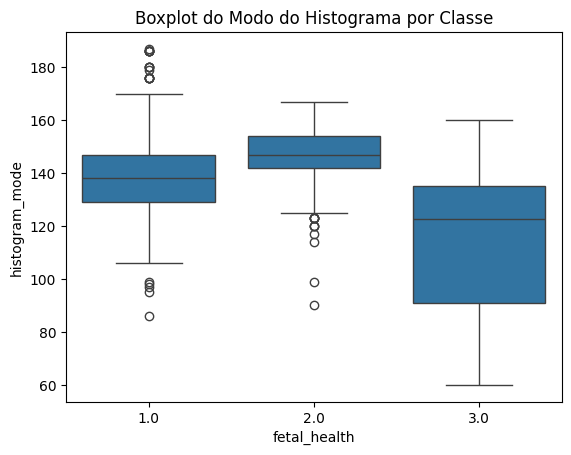

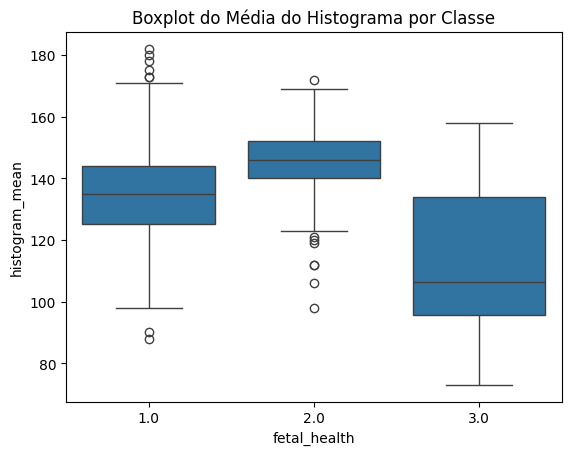

In [13]:
histogram_variables = ['histogram_width', 'histogram_mode', 'histogram_mean']
sns.boxplot(x='fetal_health', y='histogram_width', data=df)
plt.title('Boxplot da Largura do Histograma por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='histogram_mode', data=df)
plt.title('Boxplot do Modo do Histograma por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='histogram_mean', data=df)
plt.title('Boxplot do Média do Histograma por Classe')
plt.show()

#### Análise de Tendências

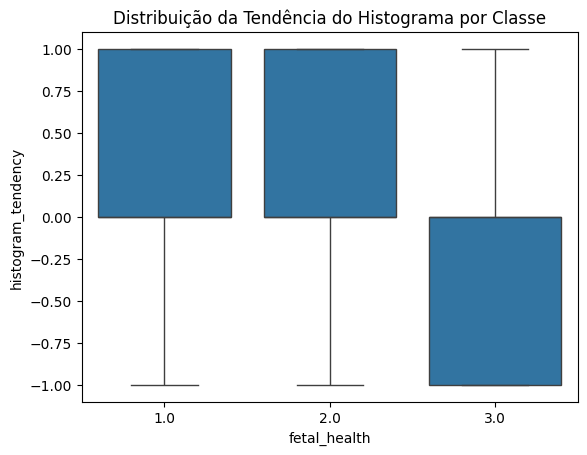

In [14]:
sns.boxplot(x='fetal_health', y='histogram_tendency', data=df)
plt.title('Distribuição da Tendência do Histograma por Classe')
plt.show()

## **3. Data preparation (Preparação dos dados)**

#### Tratamento de Dados Ausentes

In [15]:
print(df.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### Visualização de Outliers

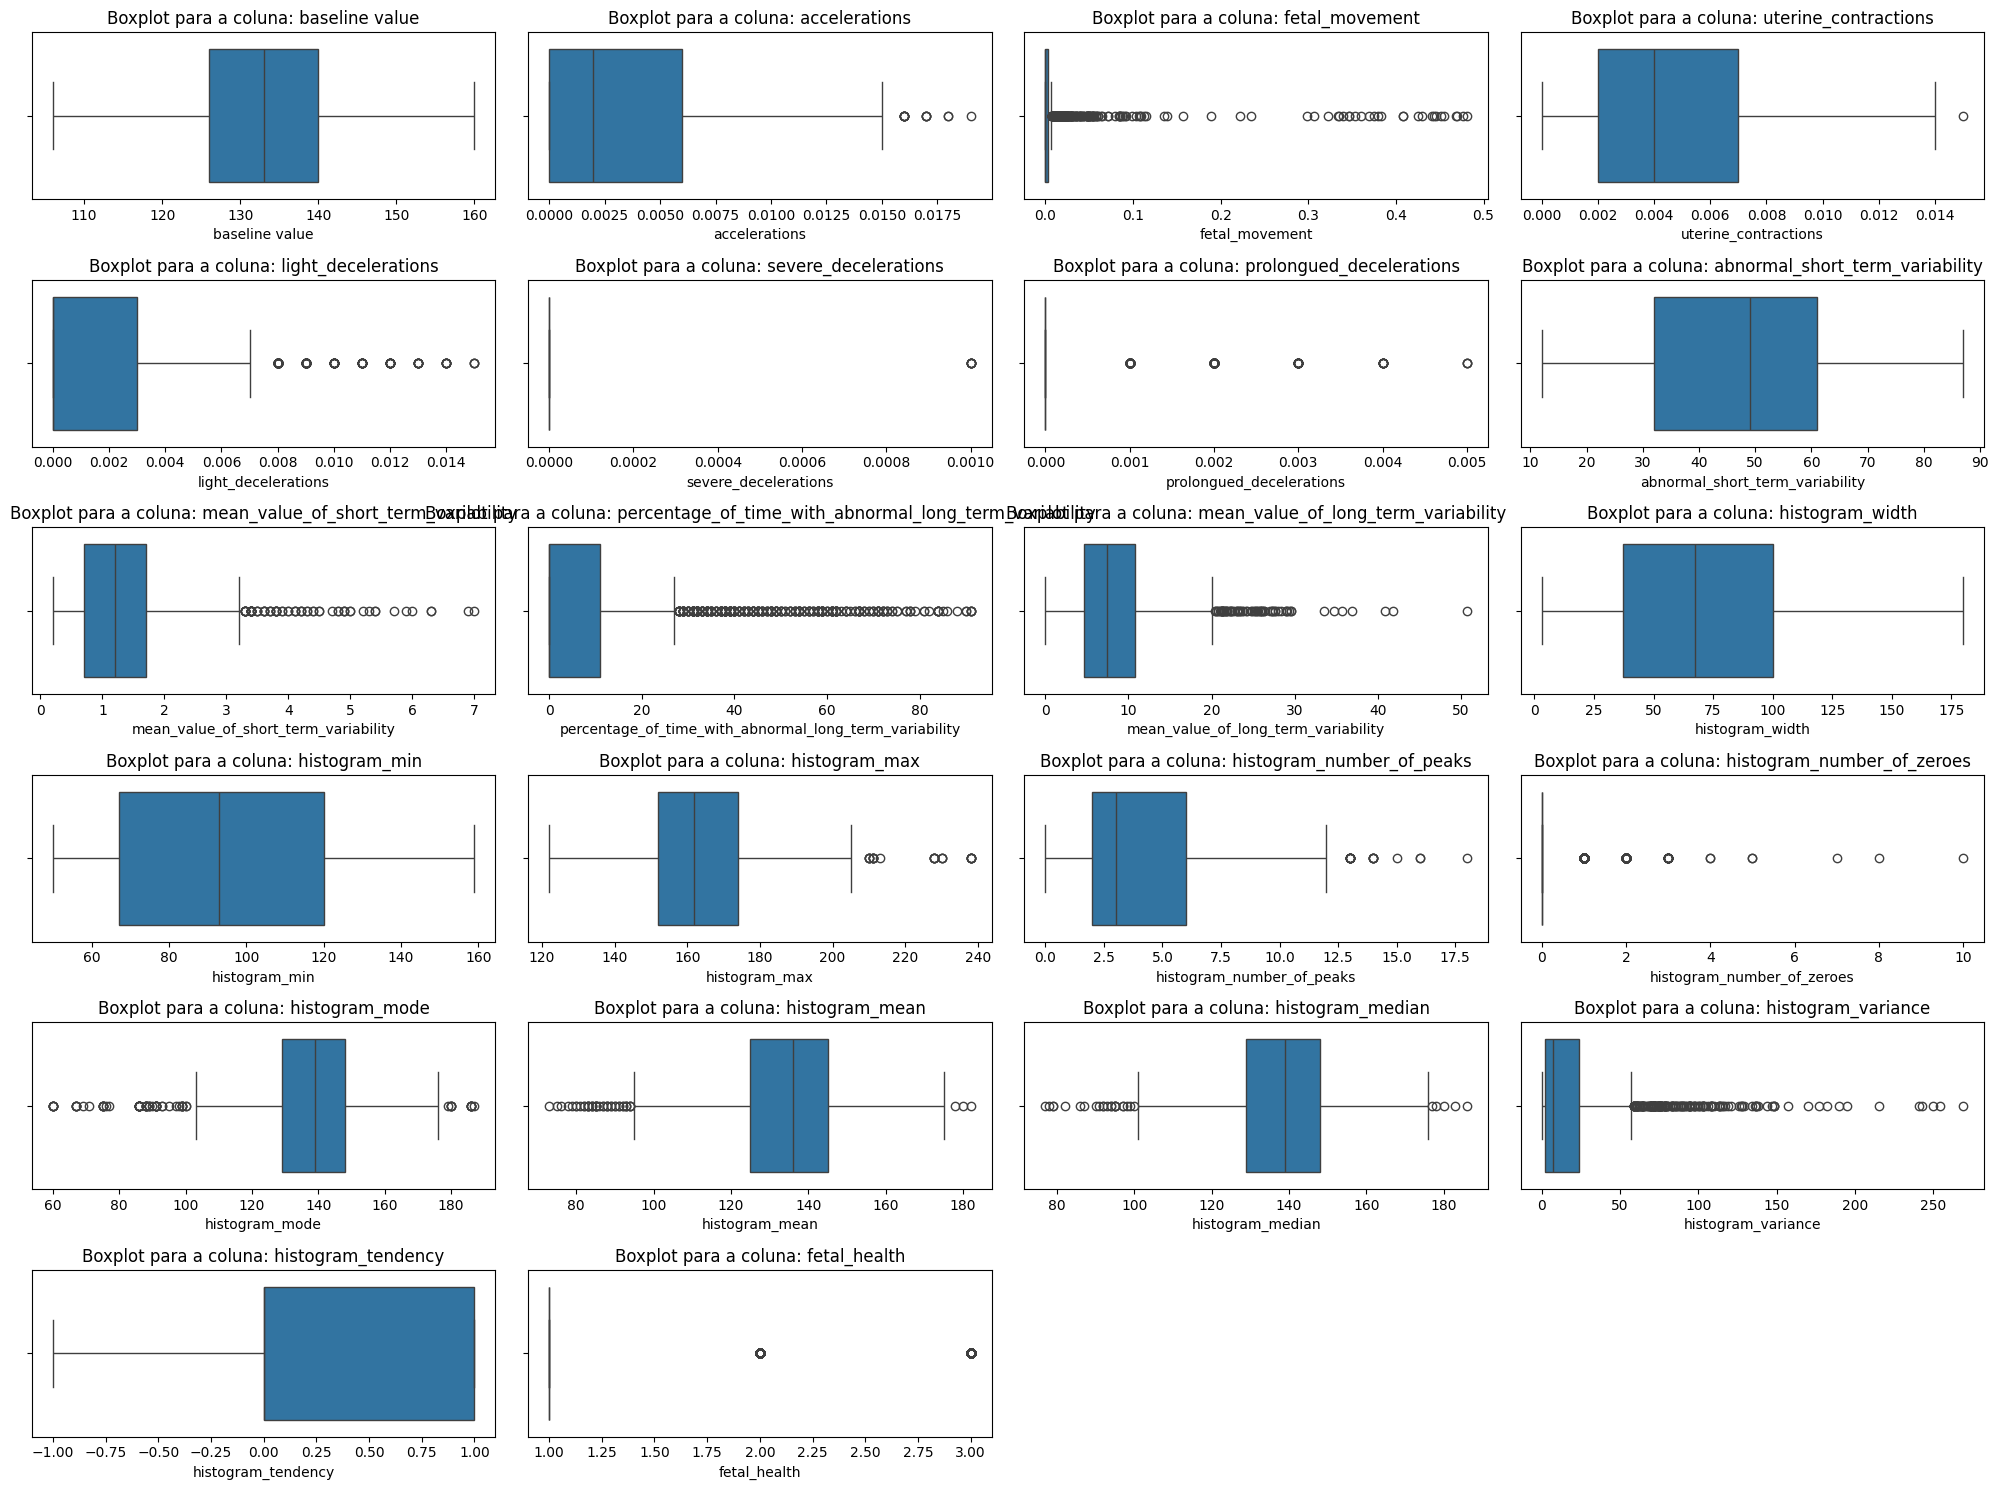

In [16]:
plt.figure(figsize=(20, 15))

# Crie subplots (6, 4) para cada coluna
for i, column in enumerate(df.columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot para a coluna: {column}')

# Ajuste o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()

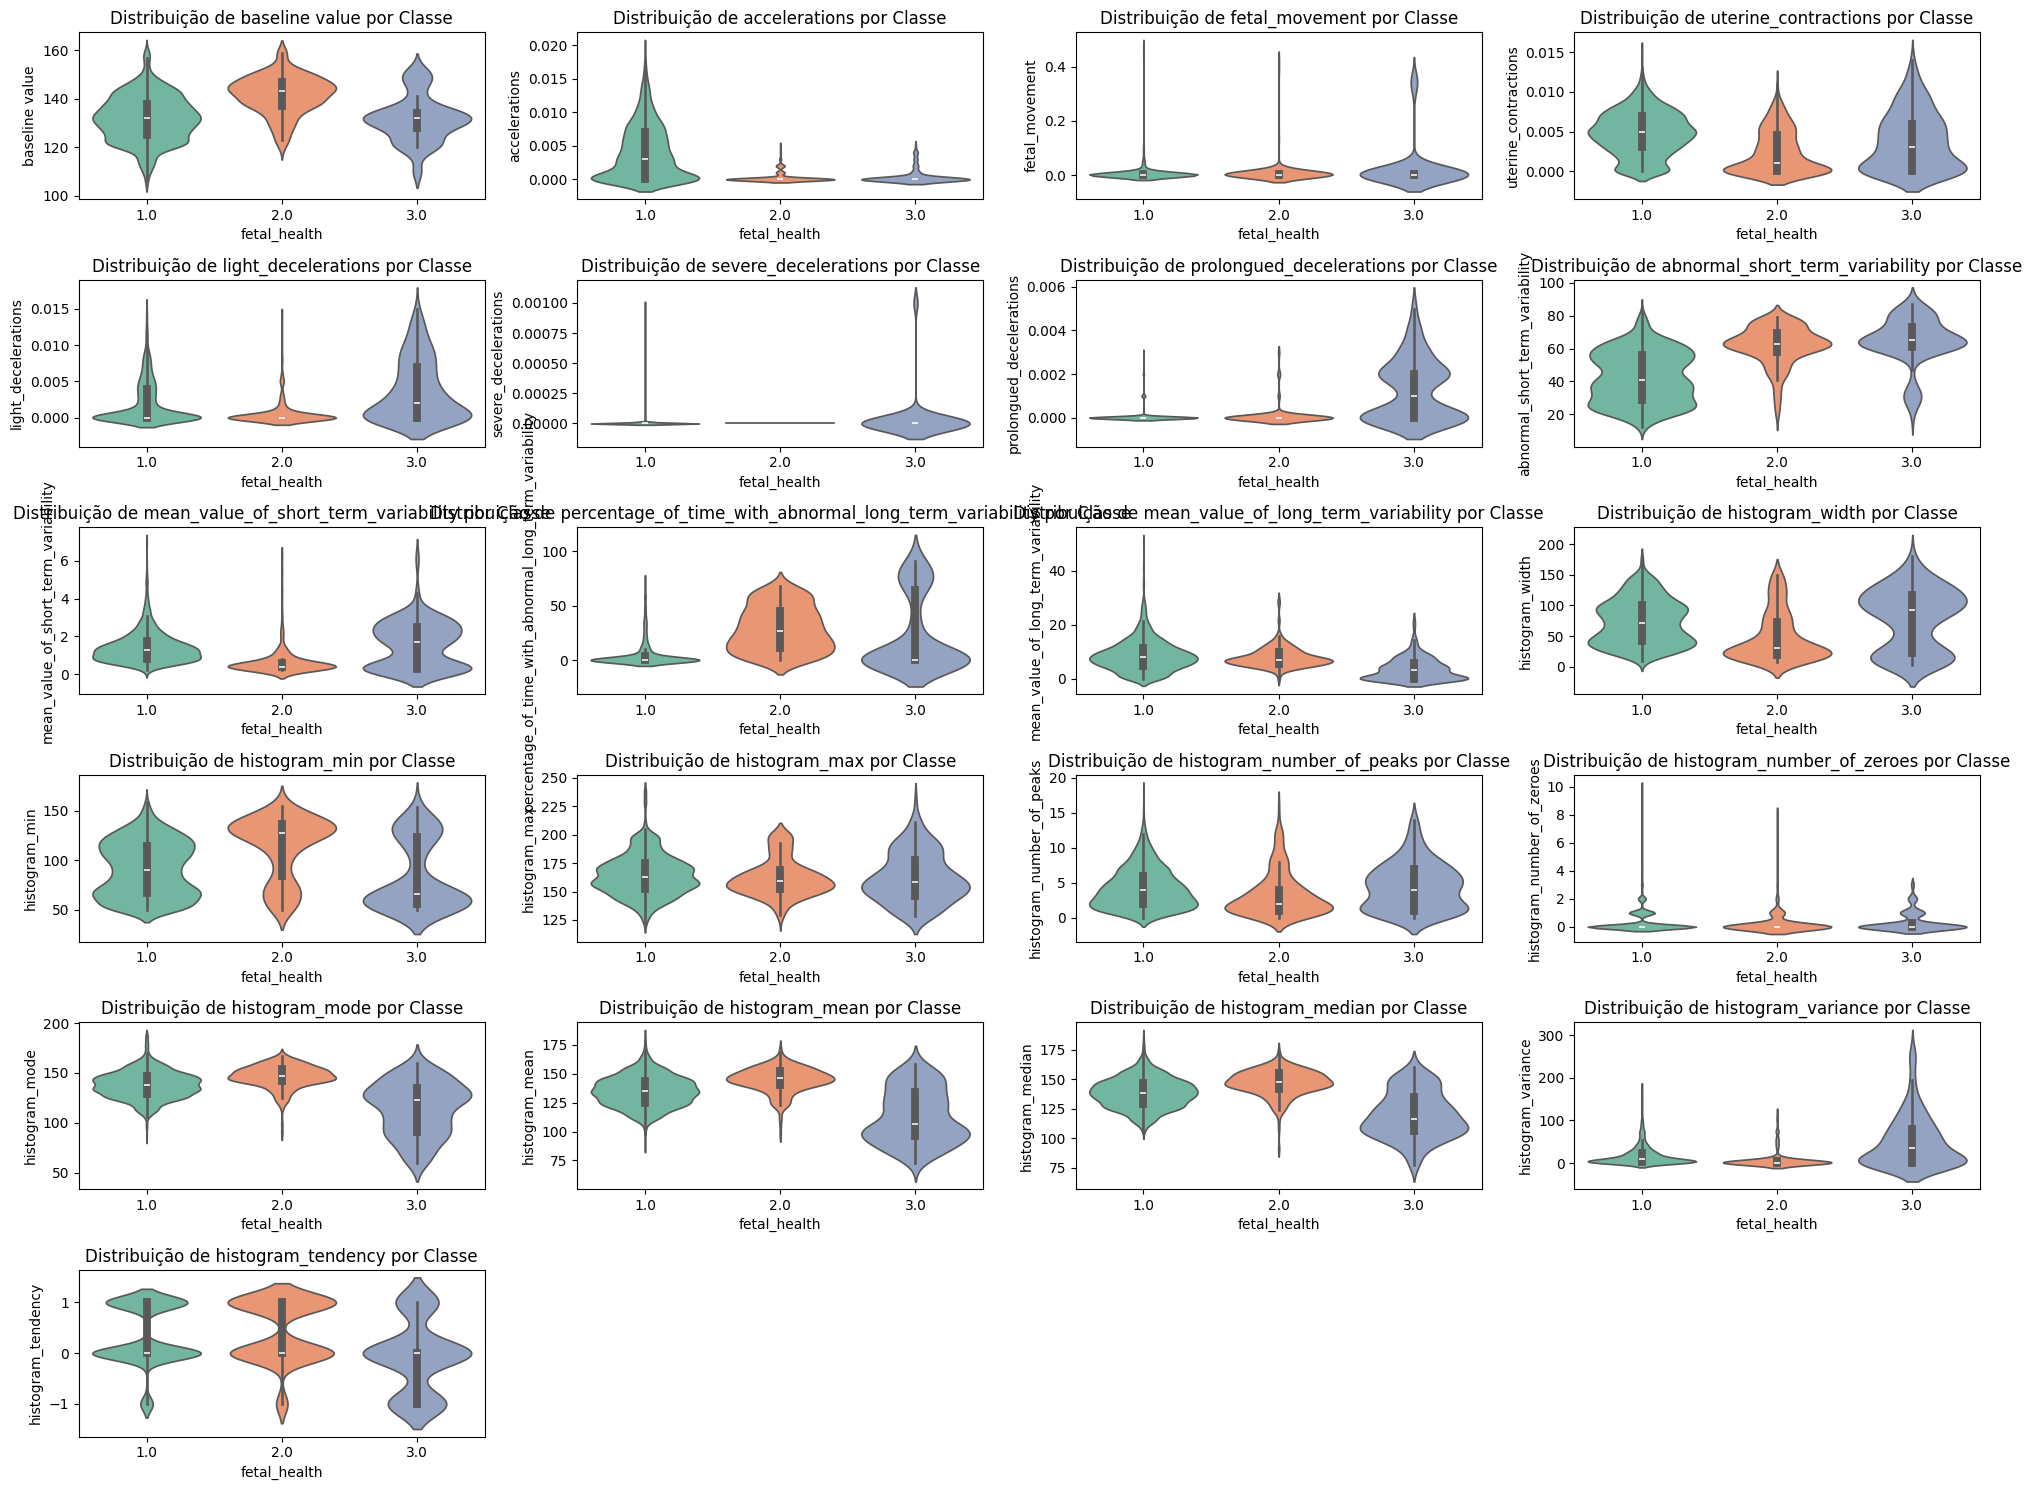

In [17]:
# Ajuste o tamanho da figura conforme necessário
plt.figure(figsize=(20, 15))

# Itera sobre cada coluna e cria um subplot com um gráfico de violino para cada classe
for i, column in enumerate(df.columns[:-1]):  # Ignorando a coluna de classe
    plt.subplot(6, 4, i + 1)
    sns.violinplot(x='fetal_health', y=column, data=df, palette='Set2')
    plt.title(f'Distribuição de {column} por Classe')

# Ajusta o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()

A partir dos gráficos de boxplot e de violino criados para cada um dos parâmetros do nosso dataset é possível perceber as diferentes distribuições de outliers para cada uma das classes, sendo possível notar que alguns dos outliers ao olharmos o conjunto como um todo, são pontos dentro do esperado ao olharmos por classe, devido a diferença no número de instâncias para cada um delas. Devido a isso e ao número reduzido de instâncias em classses minoritárias optamos por não realizar a eliminação de outliers, e a partir de testes foi possível perceber que isso acarretou em resultados melhores para os modelos aplicados.

#### Normalização

In [18]:
# Inicialize o scaler
scaler = StandardScaler()

# Ajuste e transforme os dados
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#### Balanceamento de Classes

Foi analisado o efeito do uso de métodos de balanceamento de classe sugeridos pelo ChatGPT, com o objetivo de criar número igual de amostras de cada uma das classes e desse modo adquirir previsões mais precisas. Mas os resultados foram negativos em comparação ao dataset não balanceado, desse modo foi descartada essa estratégia.

In [19]:
# Verifique o balanceamento atual
print("Contagem de classes antes do balanceamento:", Counter(df['fetal_health']))

# Aplique SMOTE para balancear as classes
smote = SMOTE()
X,y=df.drop('fetal_health', axis=1), df['fetal_health']
X_resampled, y_resampled = smote.fit_resample(X,y)

# Verifique o balanceamento após o balanceamento
print("Contagem de classes após o balanceamento:", Counter(y_resampled))

Contagem de classes antes do balanceamento: Counter({1.0: 1655, 2.0: 295, 3.0: 176})
Contagem de classes após o balanceamento: Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})


#### PCA

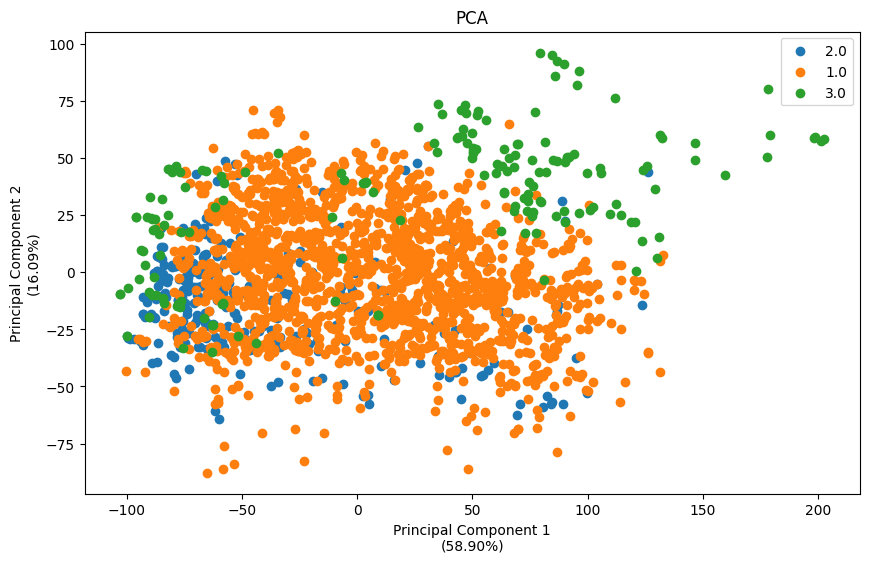

In [20]:
pca = PCA()
X_pca = pca.fit_transform(X)


# Choose the number of components based on the plot or a desired threshold
# For example, if 95% of variance is explained, set n_components=0.95
n_components = 2  # Replace with your desired number of components

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA components and labels
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['label'] = y

# Plot the data in the reduced-dimensional space
plt.figure(figsize=(10, 6))
for label in y.unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.xlabel(f'Principal Component 1\n({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2\n({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA')
plt.legend()
plt.show()

#### Divisão dos Dados

In [21]:
from sklearn.model_selection import train_test_split

# Divida os dados em conjunto de treinamento e teste
#Com balanceamento
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
#Sem balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Seleção de Características

Outra estratégia de preparação de dados sugerida pelo ChatGPT foi a seleção de características utilizando regressão logistíca de modo a adquirir previsões mais precisas. As métricas de validação foram computadas para os classificadores com essa seleção de features, mas, com exceção do SVM, todos os modelos tiveram a performance reduzida com essa estratégia. Portanto, decidiu-se que os modelos receberiam todas as features para executar a classificação.

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicialize o modelo
model = LogisticRegression()

# Inicialize o seletor de características
rfe = RFE(model, n_features_to_select=10)

# Ajuste o seletor aos dados
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)


In [23]:
# Obtenha os índices das características selecionadas
selected_feature_indices = rfe.support_

# Obtenha os nomes das características selecionadas
selected_feature_names = X_train.columns[selected_feature_indices]

# Mostre os nomes das características selecionadas
print("Características Selecionadas:")
print(selected_feature_names)

Características Selecionadas:
Index(['baseline value', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_number_of_peaks',
       'histogram_mean', 'histogram_median', 'histogram_variance',
       'histogram_tendency'],
      dtype='object')


## **4. Modeling (Modelagem)**

### Funções auxiliares

In [24]:
model_results = {}

### Naive Bayes

O algoritmo Naive Bayes é uma abordagem simples e eficiente para problemas de classificação. Sua simplicidade facilita a compreensão e implementação, tornando-o uma escolha popular, especialmente em situações com conjuntos de dados de alta dimensão, como classificação de texto. Além disso, a eficiência computacional do Naive Bayes o torna uma opção viável quando os recursos computacionais são limitados.

Entretanto, suas vantagens vêm acompanhadas de limitações. A principal delas é a suposição de independência entre as características, o que pode comprometer sua eficácia em problemas mais complexos nos quais as características estão inter-relacionadas. Além disso, a sensibilidade a dados de treinamento inadequados e a incapacidade de lidar eficientemente com dados ausentes são desafios que devem ser considerados ao escolher o Naive Bayes para uma determinada tarefa de classificação.

In [25]:
# Crie e treine o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Faça previsões
predictions = nb_model.predict(X_test)

# # Avalie o desempenho do modelo
model_results['Naive Bayes'] = (y_test, predictions)


### Árvore de Decisão

As árvores de decisão são modelos flexíveis e interpretáveis amplamente utilizados em aprendizado de máquina. Sua capacidade de representar decisões complexas de forma intuitiva é uma vantagem significativa, tornando-as versáteis para classificação e regressão em diversos tipos de dados. No entanto, é preciso atenção à propensão ao overfitting, especialmente em árvores profundas, o que pode exigir técnicas de poda para garantir uma boa generalização para novos dados. Em suma, as árvores de decisão oferecem uma abordagem poderosa, mas é essencial controlar seu ajuste aos dados de treinamento para otimizar o desempenho.

In [26]:
# Crie e treine o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Faça previsões
predictions = dt_model.predict(X_test)
model_results['Decision Tree'] = (y_test, predictions)

### Linear Discriminant Analysis

A Análise Discriminante Linear (LDA) destaca-se pela eficácia na redução de dimensionalidade, preservando informações discriminantes em problemas de classificação com classes bem separadas. No entanto, sua aplicação pode ser limitada pela suposição de covariâncias iguais entre as classes e pela sensibilidade a outliers. Em síntese, a LDA oferece uma abordagem eficaz para problemas específicos, mas é crucial considerar suas suposições e sensibilidade em cenários práticos.

In [27]:
# Crie e treine o modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Faça previsões
predictions = lda_model.predict(X_test)
model_results['LDA'] = (y_test, predictions)

### Support Vector Machine

As Máquinas de Vetores de Suporte (SVM) são poderosos modelos de aprendizado de máquina usados para classificação e regressão. Sua principal vantagem reside na capacidade de encontrar um hiperplano ótimo que maximize a margem entre classes, resultando em uma boa generalização para dados não vistos. As SVMs são eficazes em espaços de alta dimensão, sendo particularmente úteis em problemas complexos nos quais a separação entre classes não é linear.

Contudo, as SVMs podem ser sensíveis ao ajuste de parâmetros e podem exigir pré-processamento cuidadoso dos dados, como normalização. Além disso, podem ser computacionalmente intensivas, especialmente em conjuntos de dados grandes. Em resumo, as SVMs oferecem uma abordagem robusta para problemas de classificação em espaços de alta dimensão, embora exijam ajuste de parâmetros e considerações computacionais.

In [28]:
# Crie e treine o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Faça previsões
predictions = svm_model.predict(X_test)
model_results['SVM'] = (y_test, predictions)

In [29]:
clasifiers = [nb_model, dt_model, lda_model, svm_model]

# **Resultados Experimentais e Análise**

## **5. Evaluation (Validação)**


### Computar métricas

In [30]:
def model_info(y_test, predictions, model_name):
    # Avalie o desempenho do modelo
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Converta a matriz de confusão para porcentagens
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Imprima métricas
    print(f'-------- {model_name} --------')
    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'Relatório de Classificação:\n{class_report}')

    # Visualize a matriz de confusão
    plt.figure(figsize=(8, 6))
    #Contagem
    #sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspeito', 'Patológico'], yticklabels=['Normal', 'Suspeito', 'Patológico'])
    #Porcentagem
    sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Normal', 'Suspeito', 'Patológico'], yticklabels=['Normal', 'Suspeito', 'Patológico'], cbar_kws={'label': 'Porcentagem'})
    plt.title(f'Matriz de Confusão: {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

-------- Naive Bayes --------
Acurácia: 0.8028169014084507
Precisão: 0.8697646110381371
Recall: 0.8028169014084507
F1-score: 0.8204882327210581
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.97      0.80      0.88       333
         2.0       0.50      0.89      0.64        64
         3.0       0.47      0.66      0.55        29

    accuracy                           0.80       426
   macro avg       0.65      0.78      0.69       426
weighted avg       0.87      0.80      0.82       426



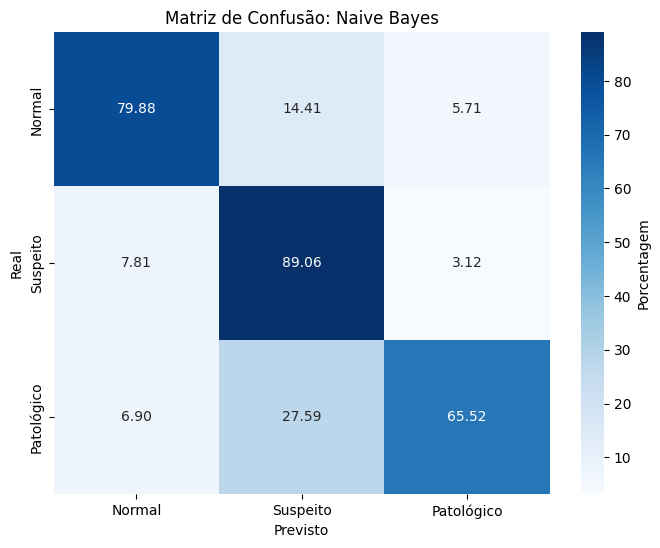

-------- Decision Tree --------
Acurácia: 0.9225352112676056
Precisão: 0.9249259845629686
Recall: 0.9225352112676056
F1-score: 0.9235218354210515
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.75      0.81      0.78        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426



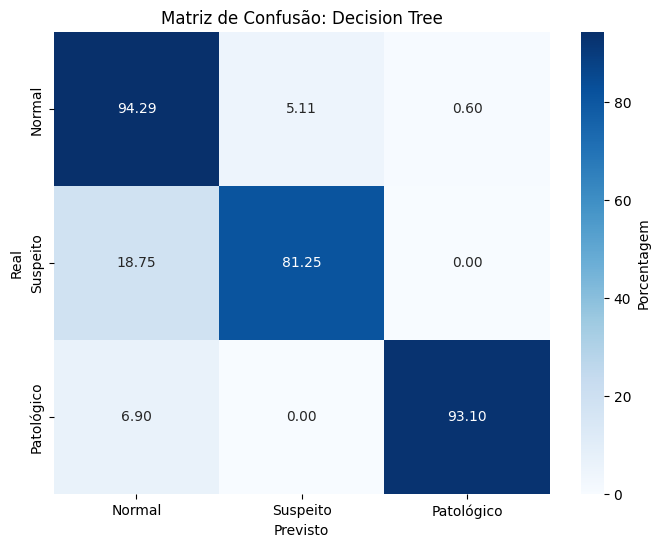

-------- LDA --------
Acurácia: 0.8826291079812206
Precisão: 0.8843765745384413
Recall: 0.8826291079812206
F1-score: 0.8820773588412834
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       333
         2.0       0.64      0.70      0.67        64
         3.0       0.81      0.59      0.68        29

    accuracy                           0.88       426
   macro avg       0.80      0.74      0.76       426
weighted avg       0.88      0.88      0.88       426



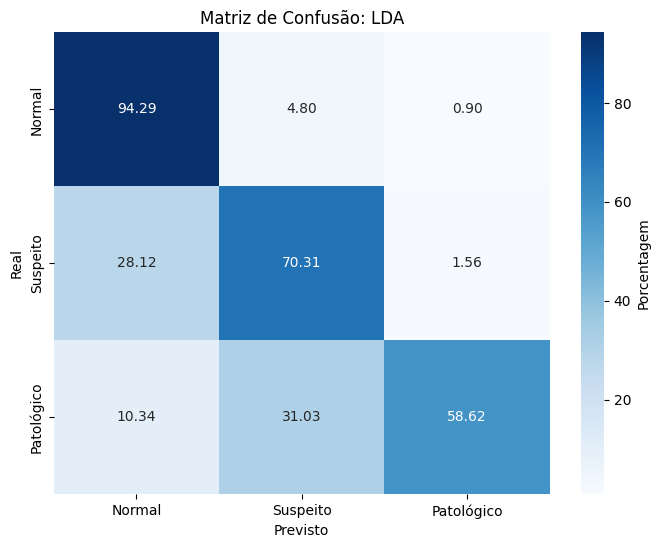

-------- SVM --------
Acurácia: 0.8732394366197183
Precisão: 0.8672850979378315
Recall: 0.8732394366197183
F1-score: 0.8694771848805339
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



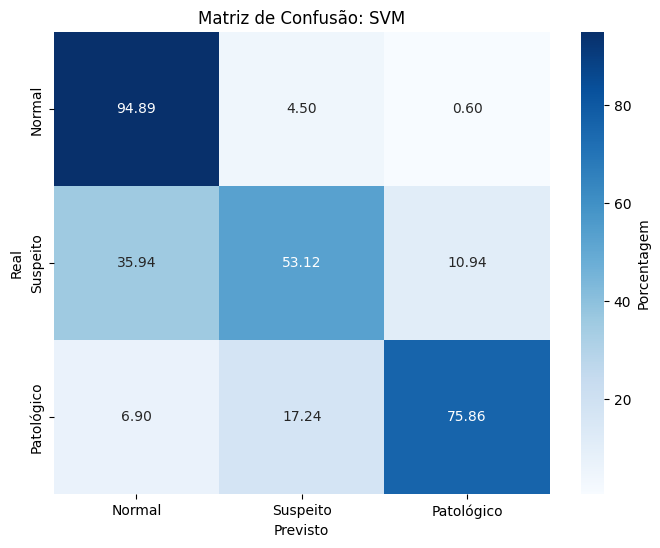

In [31]:
# INÍCIO CODIGO MANUAL
for key, value in model_results.items():
    model_info(value[0], value[1], key)
# FIM CODIGO MANUAL

Por meio das métricas computadas e das matrizes de confusão, é possível perceber que todos os modelos utilizados obtiveram um bom desempenho. Em especial, a Árvore de Decisão obteve as melhores métricas. Para confirmar os resultados e comparar melhor as métricas entre os modelos, fizemos Cross Validation, Bootstrap, intervalos de confianaça e testes t pareados.

### Cross Validation

  Ao utilizar Cross Validation o modelo é treinado em subconjuntos desses folds e avaliado em outros, permitindo uma avaliação mais abrangente do desempenho do modelo. Esse processo é repetido várias vezes, e os resultados são médias, fornecendo uma estimativa mais confiável do desempenho do modelo em dados não vistos. A validação cruzada ajuda a reduzir o viés na avaliação do modelo e fornece uma avaliação mais robusta de sua capacidade de generalização.

In [42]:
def cross_validation(classifier, X, y, k = 5, scoring = "accuracy"):

    # Create a k-fold cross-validation object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    cross_val_results = cross_val_score(classifier, X, y, cv=kf, scoring=scoring)  # Change scoring as needed
    print(f"------------ classfier: {classifier.__class__.__name__} ------------")
    print(f"metric: {scoring}")
    #print("Cross-Validation Results:", cross_val_results)
    print("Average {}: {:.2f} +- {:.2f}".format(scoring, cross_val_results.mean(), cross_val_results.std()))

In [45]:
scoring_array = ['accuracy', 'f1_micro', 'recall_micro'] # micro porque tem desbalanceamento entre as classes
for classifier in clasifiers:
    for scoring in scoring_array:
        cross_validation(classifier, X, y, k=7, scoring=scoring)


------------ classfier: GaussianNB ------------
metric: accuracy
Average accuracy: 0.81 +- 0.02
------------ classfier: GaussianNB ------------
metric: f1_micro
Average f1_micro: 0.81 +- 0.02
------------ classfier: GaussianNB ------------
metric: recall_micro
Average recall_micro: 0.81 +- 0.02
------------ classfier: DecisionTreeClassifier ------------
metric: accuracy
Average accuracy: 0.92 +- 0.02
------------ classfier: DecisionTreeClassifier ------------
metric: f1_micro
Average f1_micro: 0.92 +- 0.02
------------ classfier: DecisionTreeClassifier ------------
metric: recall_micro
Average recall_micro: 0.92 +- 0.02
------------ classfier: LinearDiscriminantAnalysis ------------
metric: accuracy
Average accuracy: 0.88 +- 0.02
------------ classfier: LinearDiscriminantAnalysis ------------
metric: f1_micro
Average f1_micro: 0.88 +- 0.02
------------ classfier: LinearDiscriminantAnalysis ------------
metric: recall_micro
Average recall_micro: 0.88 +- 0.02
------------ classfier: SVC 

Em todos os modelos, a cross validation não obteve grandes valores de desvio padrão, o que sugere que os classificadore são consistentes com os diferentes subconjuntos de dados. Além disso, não se nota uma diferença muito grande entre as métricas nas dobras e no conjunto de treino, o que sugere uma "fitting" adequado aos dados.

### Bootstrap

O bootstrap é uma técnica estatística utilizada para estimar a distribuição amostral de uma estatística, como média ou erro de um modelo.
O método consiste em criar múltiplias amostras de dados, com reposição, a partir do conjunto original. O modelo é treinado e avaliado em cada uma dessas amostras bootstrap, proporcionando uma visão mais abrangente da variabilidade do desempenho do modelo. Essa abordagem ajuda a quantificar a incerteza associada às estimativas do modelo e fornece intervalos de confiança mais robustos.

In [34]:
def bootstrap(classifier, X, y, n_iterations=100):
    # run bootstrap
    results = []
    for _ in range(n_iterations):
        # Create a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X, y, random_state=_)

        # Train your model on the bootstrap sample
        classifier.fit(X_bootstrap, y_bootstrap)

        # Make predictions on the original data points not included in the bootstrap sample
        predictions = classifier.predict(X)

        # Evaluate the performance metric of interest
        accuracy = accuracy_score(y, predictions)
        
        # Store the result
        results.append(accuracy)

    return results

In [51]:
n_iterations = 100
for classifier in clasifiers:
    print(f"------------ classfier: {classifier.__class__.__name__} ------------")
    print("metric: accuracy")
    results = bootstrap(classifier, X, y, n_iterations=n_iterations)
    avg_accuracy = np.sum(results) / n_iterations
    std_accuracy = np.std(results)
    print("Average accuracy: {:.3f} +- {:.3f}".format(avg_accuracy, std_accuracy))

------------ classfier: GaussianNB ------------
metric: accuracy
Average accuracy: 0.81 +- 0.01
------------ classfier: DecisionTreeClassifier ------------
metric: accuracy
Average accuracy: 0.97 +- 0.00
------------ classfier: LinearDiscriminantAnalysis ------------
metric: accuracy
Average accuracy: 0.88 +- 0.01
------------ classfier: SVC ------------
metric: accuracy
Average accuracy: 0.89 +- 0.00


De maneira similar, em todos os modelos, o bootstrap não obteve grandes valores de desvio padrão. É verdade que as métricas encontrados no bootstrap superam um pouco os valores encontrados no cojunto de dados de teste, mas isso é esperado, visto que o bootsrap superestima essas medidas por conta da sobreposição entre as amostras.

### Confidence Intervals

O intervalo de confiança é uma medida estatística que fornece uma faixa estimada na qual a verdadeira média ou parâmetro de uma população provavelmente se situa, com uma determinada probabilidade. Ao aplicarmos para a acurácia de um modelo indicamos a faixa em que podemos razoavelmente esperar que a acurácia real do modelo esteja.

In [53]:
# INICIO CODIGO ALTERADO 
# Foi utilizado o bootstrap para gerar o intervalo de confiança
def calculate_confidence_interval(classifier, X, Y, n_iterations, confidence_level = 0.95): 
    results = []
    for _ in range(n_iterations):
        # Create a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X, y, random_state=_)

        # Train your model on the bootstrap sample
        classifier.fit(X_bootstrap, y_bootstrap)

        # Make predictions on the original data points not included in the bootstrap sample
        predictions = classifier.predict(X)

        # Evaluate the performance metric of interest
        accuracy = accuracy_score(y, predictions)
        
        # Store the result
        results.append(accuracy)
    confidence_interval = t.interval(confidence_level, len(results)-1, loc=np.mean(results), scale=sem(results))
    return confidence_interval
# FIM CODIGO ALTERADO

In [54]:
# INÍCIO CODIGO MANUAL
confidence_level = 0.95
n_iterations = 100
for classifier in clasifiers:
    print(f"------------ classfier: {classifier.__class__.__name__} ------------")
    print("metric: accuracy")
    confidence_interval = calculate_confidence_interval(classifier, X, y, n_iterations=n_iterations, confidence_level=confidence_level)
    print("{}% Confidence Interval of Accuracy: {:.3f} - {:.3f}".format(int(confidence_level*100), confidence_interval[0] , confidence_interval[1]))
# FIM CODIGO MANUAL

------------ classfier: GaussianNB ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.812 - 0.816
------------ classfier: DecisionTreeClassifier ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.968 - 0.970
------------ classfier: LinearDiscriminantAnalysis ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.878 - 0.880
------------ classfier: SVC ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.887 - 0.888


A diferença entre o minimo e o máximo em cada um dos intervalos de confiança computados para os modelos é pequena, o que sugere uma alta precisão dos modelos. Além disso, não há muita sobreposição entre os intervalos, o que indica que alguns modelos são significativamente mais precisos que outros. 

### Paired t-test

O teste t pareado (paired t-test) é uma ferramenta estatística utilizada para comparar as médias de duas condições relacionadas. Esse método pode ser usado para comparar o desempenho de dois modelos em um mesmo conjunto de dados. Ao comparar as métricas de desempenho de ambos os modelos, o teste t pareado ajuda a determinar se há uma diferença estatisticamente significativa entre as médias das duas condições.

In [48]:
def is_difference_significant(results_a, results_b, alpha=0.05):
    """
    Perform a paired t-test to determine if the difference between two sets of results is statistically significant.

    Parameters:
    - results_a: List or array of performance metrics for classifier A.
    - results_b: List or array of performance metrics for classifier B.
    - alpha: Significance level for the test (default is 0.05).

    Returns:
    - True if the difference is statistically significant, False otherwise.
    """

    # Perform a paired t-test
    _, p_value = ttest_rel(results_a, results_b)

    # Check if the difference is statistically significant
    return p_value < alpha

In [50]:
n_iterations = 100
results_classifiers = []
for clasifier in clasifiers:
    results_classifiers.append(bootstrap(clasifier, X, y, n_iterations=n_iterations))
    
for i in range(len(results_classifiers)):
    for j in range(i, len(results_classifiers)):
        is_different = is_difference_significant(results_classifiers[i], results_classifiers[j])
        if(is_different):
            print(f"{clasifiers[i].__class__.__name__} is different from {clasifiers[j].__class__.__name__}")
        

GaussianNB is different from DecisionTreeClassifier
GaussianNB is different from LinearDiscriminantAnalysis
GaussianNB is different from SVC
DecisionTreeClassifier is different from LinearDiscriminantAnalysis
DecisionTreeClassifier is different from SVC
LinearDiscriminantAnalysis is different from SVC


Os testes pareados confirmaram que os modelos de fato tem precisões significativamente diferentes.

### Importância de cada feature

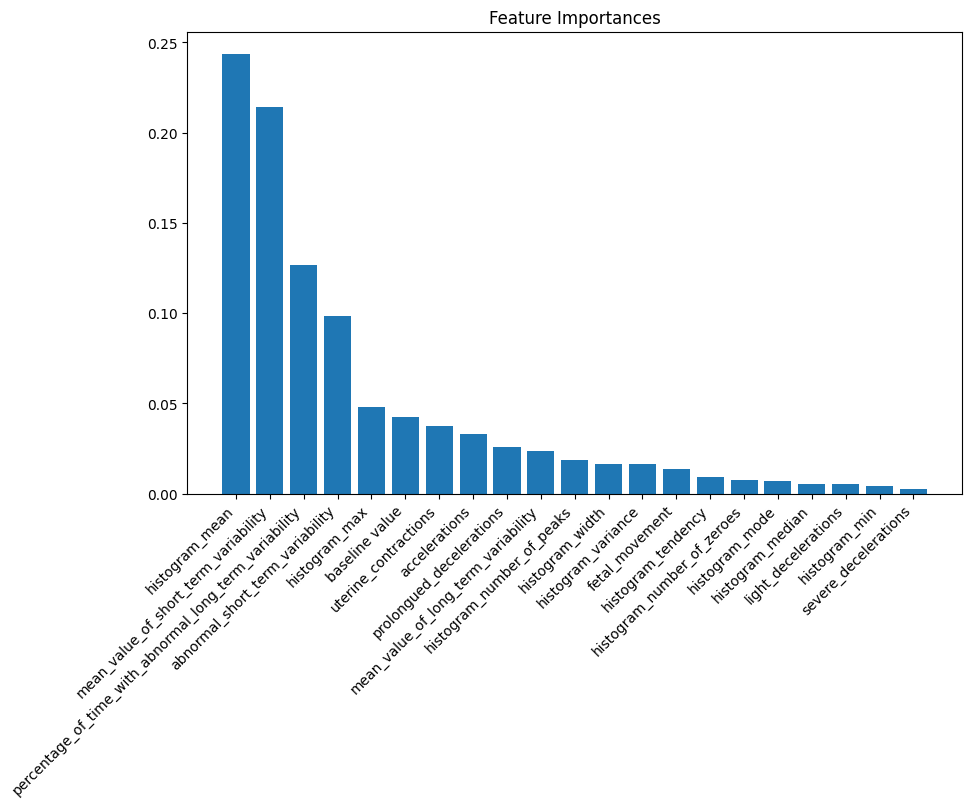

In [41]:
# Get feature importances

feature_importances = dt_model.feature_importances_
# Get the names of the features
feature_names = list(X_train.columns)  # Replace with your feature names or column indices
# Sort features based on their importance
sorted_indices = feature_importances.argsort()[::-1]
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
plt.title('Feature Importances: Decision Tree')
plt.show()


Como o classificador de Árvore de Decisão foi o que obteve melhor desempenho segundo as métricas computadas, julgou que seria interesssante avaliar as features mais importantes no processo de classificação desse modelo. 

# **Conclusão e Perspectivas**

|                        | Acurácia | Precisão | Recall   | F1-Score |
|------------------------|----------|----------|----------|----------|
| Naive Bayes            | 0.80     | 0.87     | 0.80     | 0.82     |
| Decision Tree          | 0.92 | 0.92 | 0.92 | 0.92 |
| LDA                    | 0.88     | 0.88     | 0.88     | 0.88     |
| Support Vector Machine | 0.87     | 0.87     | 0.87     | 0.87     |

A partir dos testes realizados é possível perceber que todos os algoritmos de classificação analisados apresentaram altos níveis de acurácia, com pelo menos 80% de acurácia no intervalo de confiança de 95%.


Entre os modelos analisados é perceptível que o algortimo que trouxe melhores resultados foi o de Árvore de Decisão, trazendo um F1-score de 0.923 e uma acurácia de 0.922, os quais se destacam em relação aos outros algoritmos em que ambas as métricas ficaram abaixo de 0.9. 


Essa diferença do resultado entre eles pode ser relacionada as vantagens do algoritmo da Árvore de Decisão como a capacidade de lidar com relações não lineares nos dados, o que pode ser um diferencial em relação a SVM  e LDA, e a robustez a features irrelevantes.

Apesar da diferença de resultado explicitada foi possível perceber as vantagens e desvantagens de cada um dos algoritmos e entender melhor o potencial deles em diferentes tarefas de classificação.